#  SOCAT neural-network : First steps

This notebook contains all the code to run neural network using Tensorflow
Driver data includes: SST, SSS, MLD, CHL, CO2 and we are predicting fCO2

We are starting with monthly gridded observations 1998 - 2010

In [18]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

### All you need to change is data_dir

In [19]:
data_dir='/Users/gloege/Documents/Projects/SOCAT-neural-network/data/data_driver_fixed/'
os.listdir(data_dir)

['SOCATv5_mask_199801-201012.nc',
 'SALT_1x1_199801-201012.nc',
 'MXLDEPTH_1x1_199801-201012.nc',
 'co2_avg_199801-201012.nc',
 'sst_1x1_199801-201012.nc',
 'biomes.nc',
 'SOCATv5_gridded_monthly_199801-201012.nc',
 'Chl_1x1_199801-201012.nc']

# 1. Get the data and sample like it's SOCAT

In [20]:
### SOCAT data paths
fl_mask = data_dir + 'SOCATv5_mask_199801-201012.nc'
fl_socat = data_dir + 'SOCATv5_gridded_monthly_199801-201012.nc'

### Driver data paths
fl_sss = data_dir + 'SALT_1x1_199801-201012.nc'
fl_mld = data_dir + 'MXLDEPTH_1x1_199801-201012.nc'
fl_co2 = data_dir + 'co2_avg_199801-201012.nc'
fl_sst = data_dir + 'sst_1x1_199801-201012.nc'
fl_chl = data_dir + 'Chl_1x1_199801-201012.nc'

### biomes
fl_biomes = data_dir + 'biomes.nc'

In [21]:
### SOCAT data 
ds_mask = xr.open_dataset(fl_mask)
ds_socat = xr.open_dataset(fl_socat)

### Driver data
ds_sss = xr.open_dataset(fl_sss)
ds_mld = xr.open_dataset(fl_mld)
ds_co2 = xr.open_dataset(fl_co2)
ds_sst = xr.open_dataset(fl_sst)
ds_chl = xr.open_dataset(fl_chl)

### Biomes
ds_biomes = xr.open_dataset(fl_biomes)
#mask = ds['socat_mask'].roll(xlon=-180)

In [22]:
### Make sure all the same dimensions
print('Make sure all same dimensions')
print(ds_mask['socat_mask'].shape)
print(ds_socat['FCO2_AVE_UNWTD'].shape)
print(ds_sss['SALT'].shape)
print(ds_sst['sst'].shape)
print(ds_chl['Chl'].shape)
print(ds_mld['MXLDEPTH'].shape)
print(ds_co2['co2'].shape) 


Make sure all same dimensions
(156, 180, 360)
(156, 180, 360)
(156, 180, 360)
(156, 180, 360)
(156, 180, 360)
(156, 180, 360)
(156,)


In [23]:
### Make sure all the same dimensions
print('Make sure longitudes are 0 - 360')
print(ds_mask['xlon'].values[0])
print(ds_socat['xlon'].values[0])
print(ds_sss['tlon'].values[0])
print(ds_sst['tlon'].values[0])
print(ds_chl['tlon'].values[0])
print(ds_mld['tlon'].values[0])

Make sure longitudes are 0 - 360
0.5
0.5
0.5
0.5
0.5
0.5


In [25]:
### Grid
lon = ds_socat['xlon']
lat = ds_socat['ylat']
time = ds_socat['tmnth']

### Data
mask = ds_mask['socat_mask'].values
fco2 = ds_socat['FCO2_AVE_UNWTD'].values
sss = ds_sss['SALT'].values
sst = ds_sst['sst'].values
chl = ds_chl['Chl'].values
mld = ds_mld['MXLDEPTH'].values

### This tiles CO2 so same shape as the others.
co2 = np.tile(ds_co2['co2'].values[:, np.newaxis, np.newaxis],(1,180,360))

### Show me the shape of co2
print('The shape of CO2 is now : ' + str(co2.shape))

The shape of CO2 is now : (156, 180, 360)


In [64]:
tlon, tlat = np.meshgrid(lon,lat)
biomes = np.swapaxes(ds_biomes['MeanBiomes'].roll(lon=-180),0,1).values
biomes.shape
#inds0, inds1 = np.where(biomes==3)
#biomes.shape
#plt.pcolor(tlon[inds0, inds1],tlat[inds0, inds1],biomes[inds0, inds1])
#plt.show()

(180, 360)

## Mask the data like it is SOCAT

In [105]:
sst_ma = np.ma.masked_array(sst, mask=(mask==0))
sss_ma = np.ma.masked_array(sss, mask=(mask==0))
chl_ma = np.ma.masked_array(chl, mask=(mask==0))
mld_ma = np.ma.masked_array(mld, mask=(mask==0))
co2_ma = np.ma.masked_array(co2, mask=(mask==0))

# 2. Quick plot

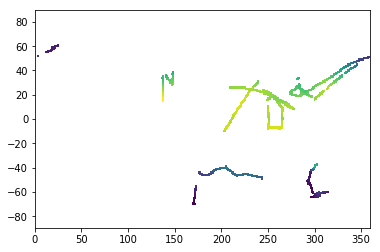

In [109]:
### This is SST sampled as soct for a single month
plt.pcolor(lon,lat,np.squeeze(sst_ma[75,:,:]))
plt.show()